#Problema 3: Distribución LogNormal

Contexto: En una tienda departamental de electrónica, los tiempos de espera de los clientes para recibir atención en el mostrador de servicio técnico tienen una distribución lognormal. Se sabe que el tiempo promedio de espera es de 10 minutos y una desviación estándar de 2 minutos, lo que genera una cola considerable en ciertos momentos del día. Objetivo: Generar tiempos de espera para 50 clientes en el mostrador de servicio y analizar la duración de la fila de espera.

Facilitador: José Gabriel Rodríguez Rivas

Alumno: Carlos Simental Arrieta


Tiempos de espera generados para los clientes (minutos):
[ 8.74 12.37  8.91 11.76  9.04 14.56  8.1   6.77  9.56  7.44 10.73 10.62
  9.32  9.4  10.16  9.48 11.8   7.46  9.64 12.33  6.94 12.41 13.22  6.82
 10.3   8.7   8.86 14.24 10.13  8.14 11.76  9.67 11.57 10.32  7.96  6.9
  7.87 12.56  9.81  8.42 11.11  9.43  6.41  9.33  8.94  8.36  9.09  9.08
 13.16  9.12]
Tiempo mínimo de espera: 6.41 minutos
Tiempo máximo de espera: 14.56 minutos
Tiempo promedio de espera: 9.78 minutos


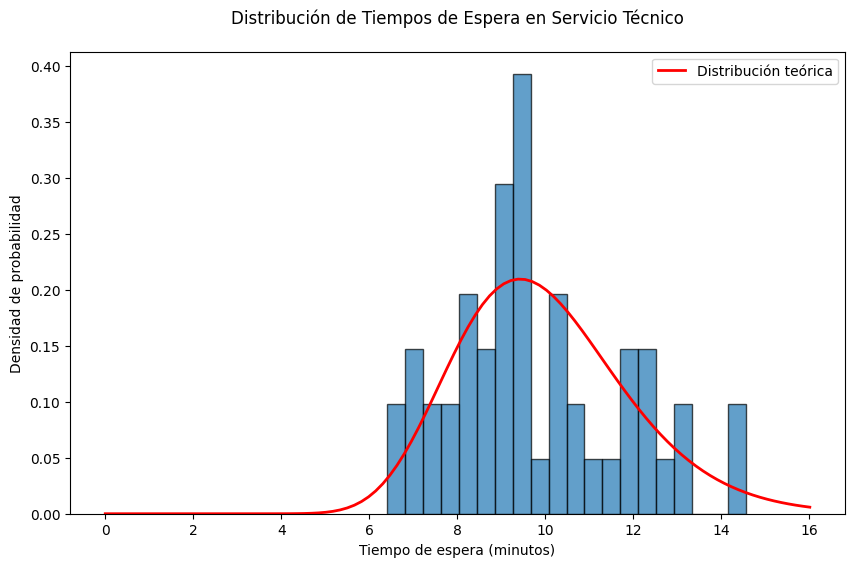

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parámetros dados del problema
tiempo_promedio = 10  # minutos
desviacion_estandar = 2  # minutos
n_clientes = 50  # número de clientes a simular

# Cálculo de los parámetros mu y sigma para la lognormal
# Convertimos los parámetros de la distribución normal subyacente
sigma = np.sqrt(np.log(1 + (desviacion_estandar**2)/(tiempo_promedio**2)))
mu = np.log(tiempo_promedio) - (sigma**2)/2

# Generar n números aleatorios U ~ Uniform(0, 1)
U = np.random.uniform(0, 1, n_clientes)

# Transformada inversa para generar tiempos de espera lognormales
Z = mu + sigma * stats.norm.ppf(U)
tiempos_espera = np.exp(Z)  # Tiempos generados en minutos

# Mostrar los resultados
print("Tiempos de espera generados para los clientes (minutos):")
print(np.round(tiempos_espera, 2))

# Calcular estadísticas importantes
print(f"Tiempo mínimo de espera: {np.min(tiempos_espera):.2f} minutos")
print(f"Tiempo máximo de espera: {np.max(tiempos_espera):.2f} minutos")
print(f"Tiempo promedio de espera: {np.mean(tiempos_espera):.2f} minutos")

# Graficar histograma de los tiempos de espera
plt.figure(figsize=(10, 6))
plt.hist(tiempos_espera, bins=20, edgecolor='black', density=True, alpha=0.7)

# Graficar la función teórica de densidad
x = np.linspace(0, np.max(tiempos_espera)*1.1, 100)
pdf = stats.lognorm.pdf(x, sigma, scale=np.exp(mu))
plt.plot(x, pdf, 'r-', lw=2, label='Distribución teórica')

# Configuración del gráfico
plt.title("Distribución de Tiempos de Espera en Servicio Técnico", pad=20)
plt.xlabel("Tiempo de espera (minutos)")
plt.ylabel("Densidad de probabilidad")
plt.legend()